# Lecture 10: Posterior-based Approach

We were trying to estimate the posterior probability of a word given a speech signal $P(W_{k} | S)$. And the HMM-based method showed that simplifying and estimating the likelihood $p(W_{k}, S)$ is simpler and efficient. Having a latent space of phones, whether context-dependant or context-independant, was efficient enough, and with clustering the context-dependant phones was even more efficient. 

Now the idea is to uncover what the posterior-based approach is all about, what are its pros and cons compared to all the other approaches, especially coupled with neural networks.

In the posterior-based approach, we are no longer working with likelihoods, they are always probabilities, either prior or conditional probabilities. 

We want to estimate the most probable word sequence, for this we would have to look over all possible word sequences $W_{k}\space \forall k$

$ W^{\star} = \underset{W_{k}}{\mathrm arg\space max}\space P(W_{k} | X) $

And $P(W_{k} | X) = \sum_{Q} P(W_{k}, Q | X)$, with X being the feature vector of the speech signal, and Q being the state sequence. Now this is $= \sum_{Q} P(Q | X, W_{k})\cdot P(W_{k} | Q)$, which can be approximated by $\approx \sum_{Q} P(Q | X) \cdot P(W_{K} | Q)$, since given X, we can assume that $W_{k}$ and Q are independant.

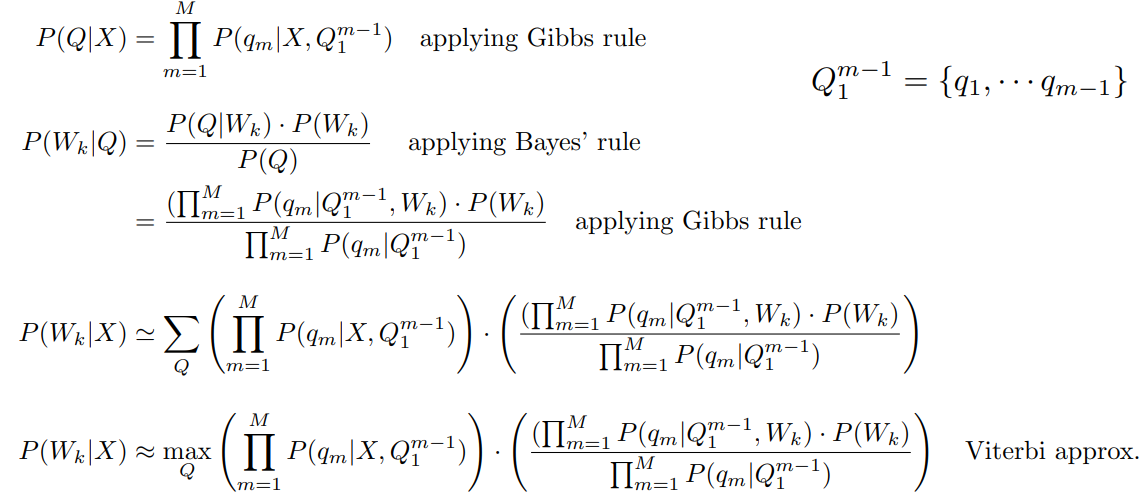

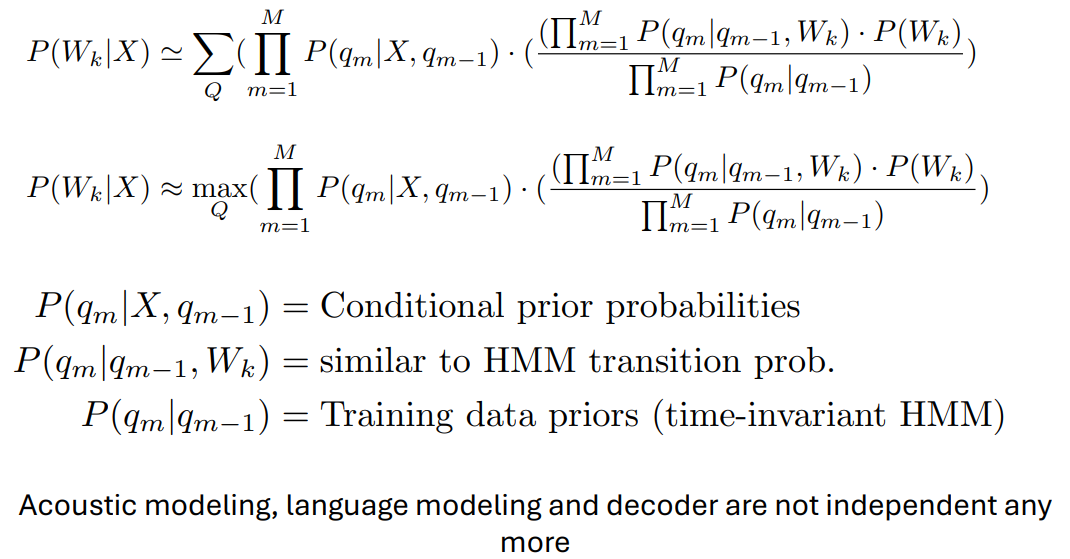

Now the theory is well developed, but how to implement it? There were a lot of practical problems.

The first thing we did, was drop the dependency (on the previous state) between $q_{m}$ and $q_{m-1}$ and limit the context, we do not look over all the length of X. And they dropped the dependency on the priors in the denominator.

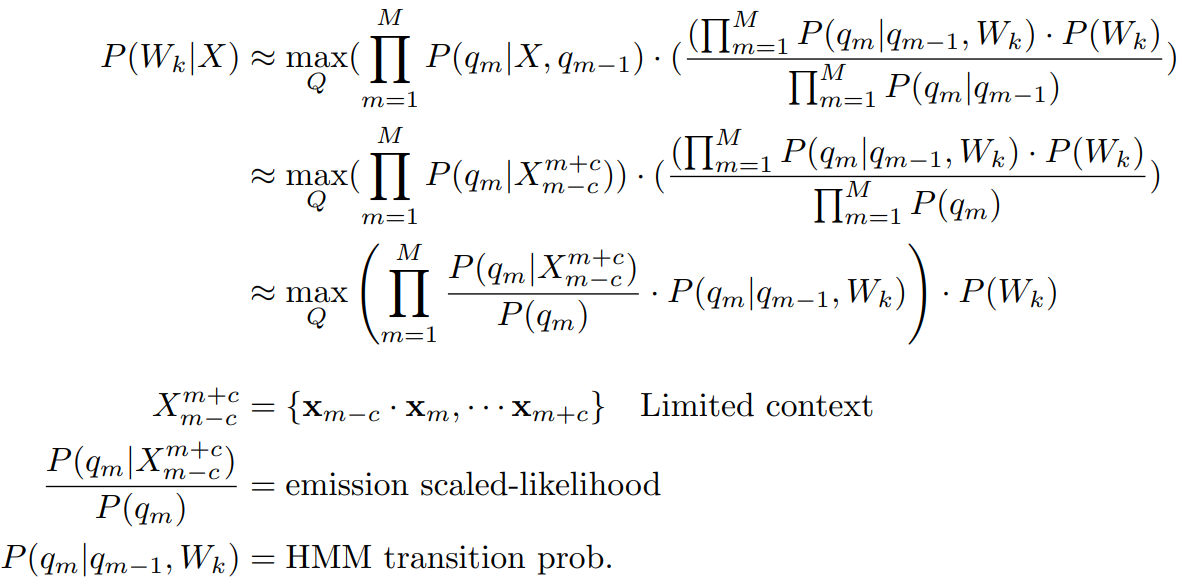

Compared to today's models, transformers can look at the whole context, we do not need to limit the context anymore, along with the extended memory, data and computation help us to jump over these limitations.

## Implementations

### CTC - Connectionist Temporal Classification

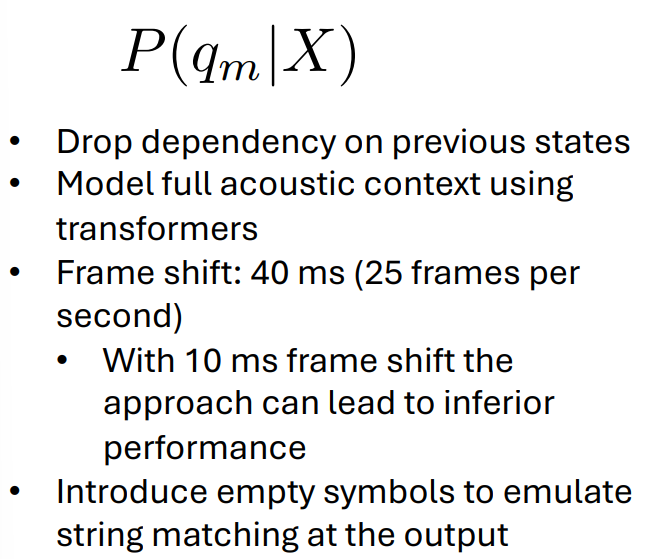

Empty symbols can (and do) cause problems, because there might be an actual silence, there will be a lot of mixing up, we would have to increase the frame length to use these empty symbols (trade-off).

### RNN-T - Recurrent Neural Network-Transducer

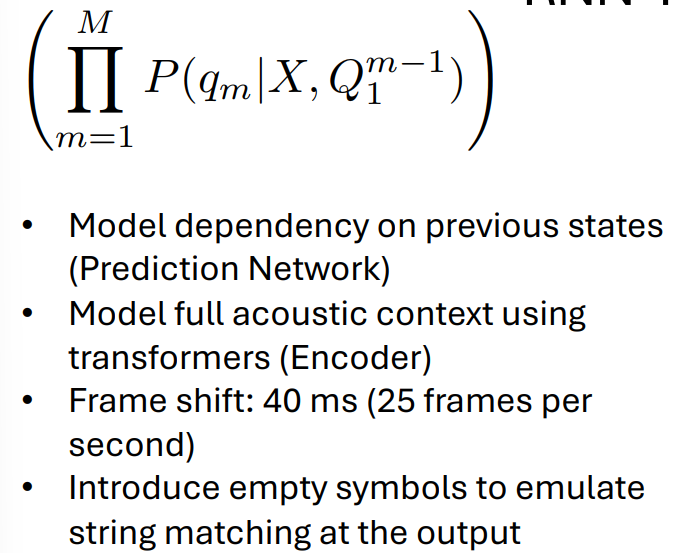

The same comment for the empty symbols. Although the simple approaches are still competitive to these advanced approached.

These models were learning internal language models, but they NEEDED an external language models. So they have to remove the internal language models (represented in the divisions in the equation).

## Taking a step back

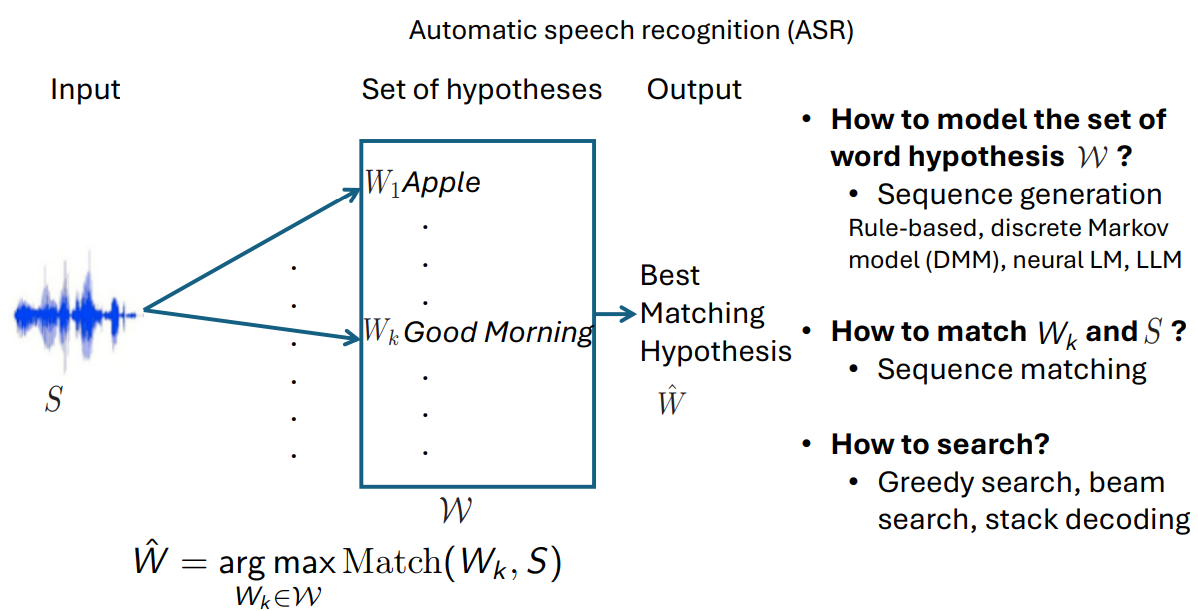

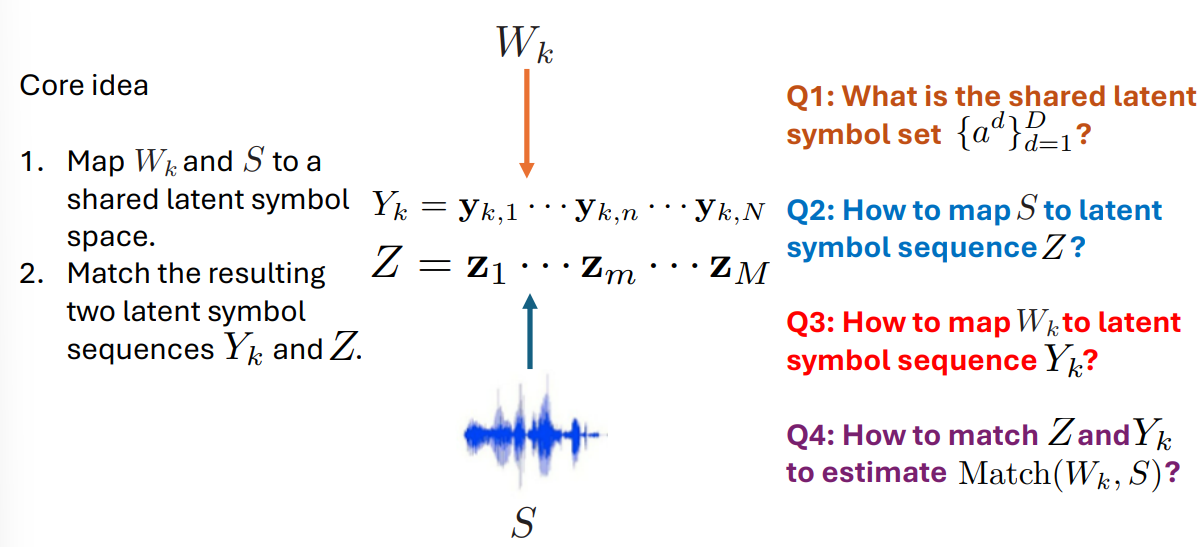

### Solving the subquestions: 

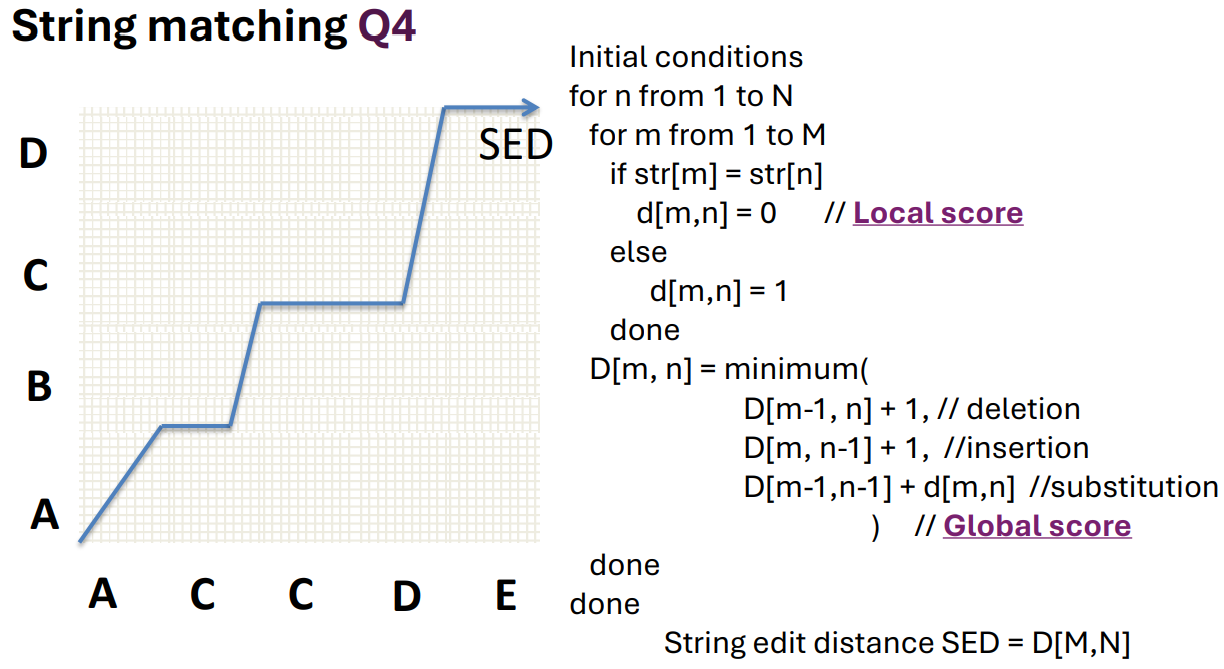

#### Deterministic symbol sequence matching: 

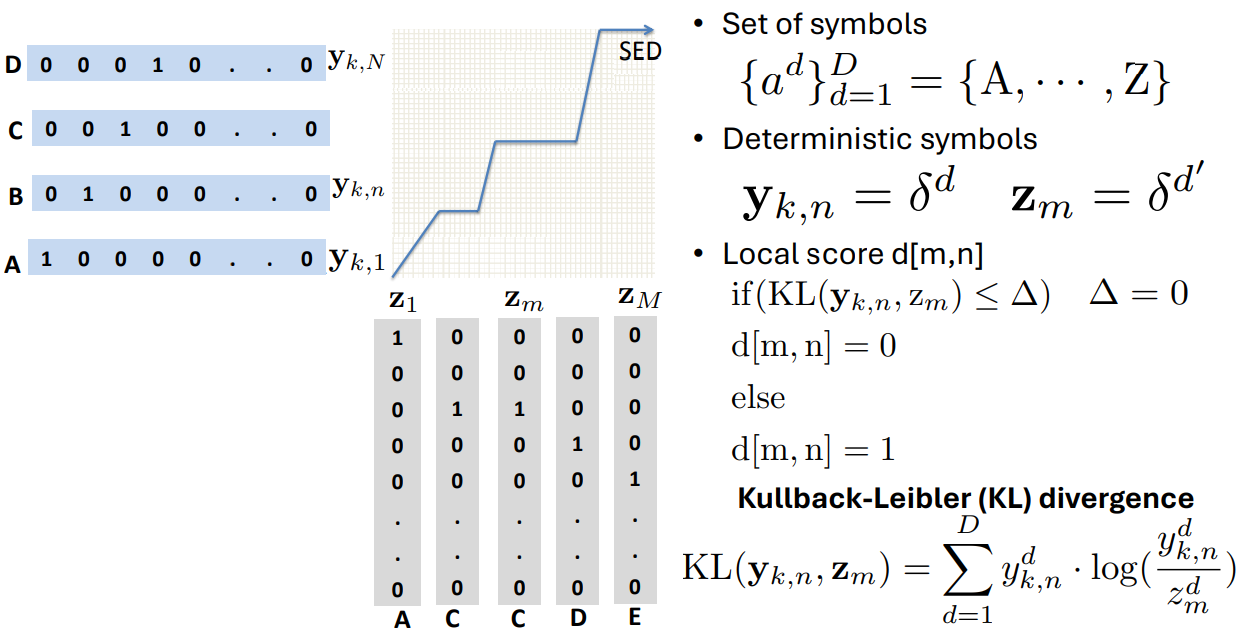

#### Probabilistic symbol sequence matching: 

Practically speaking, an error made in the deterministic symbol sequence matching will make it impossible to recover from, which is exactly why: 

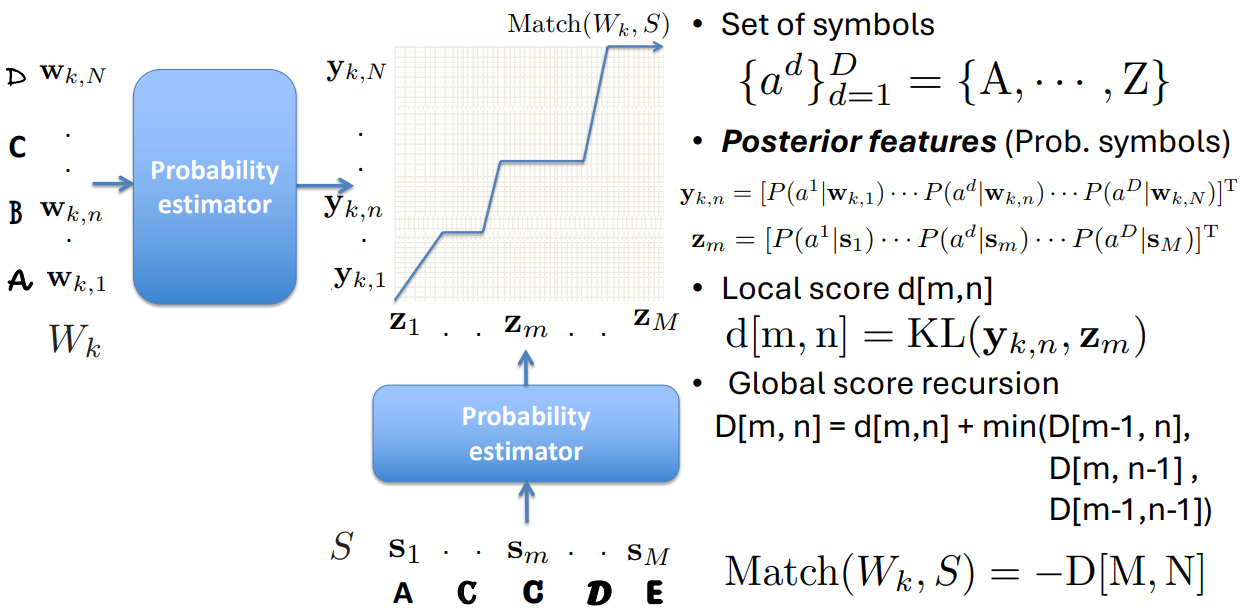

Now we need the probability estimators to be well trained.
And here we cannot proceed with the normal string matching algorithms because distributions of same-words and different-words will not be fully separable.

#### Posterior feature-based speech processing: 

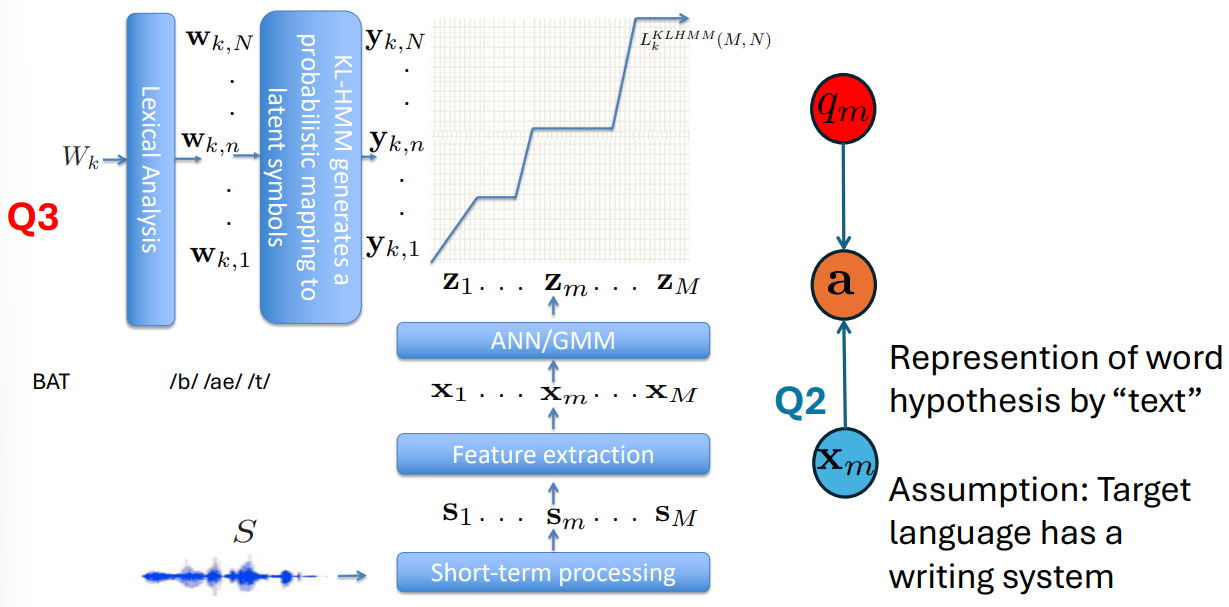

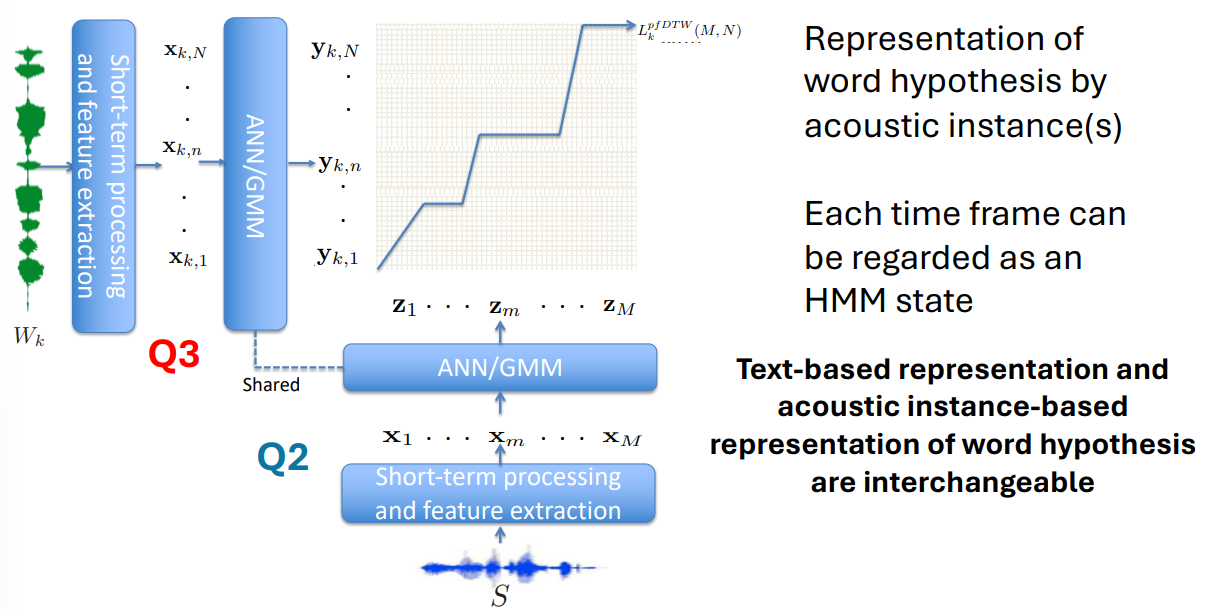

So the same results can be acheived using text as learned reference, or instance-based utterances (words, phones, etc...).

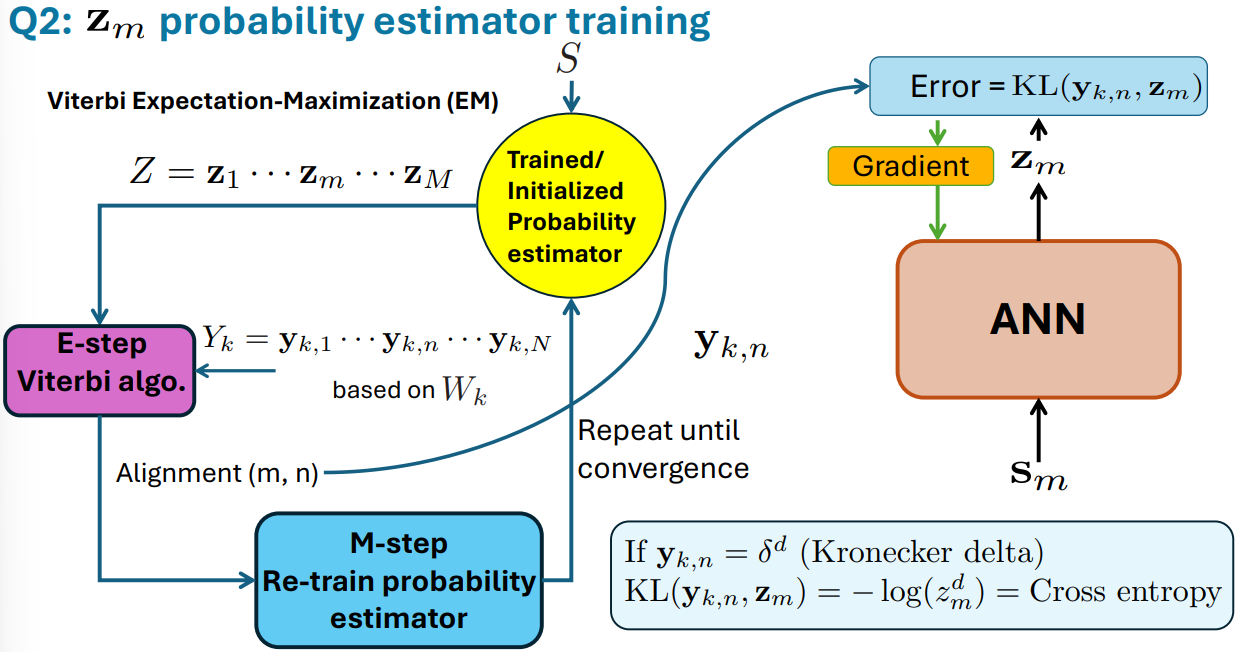

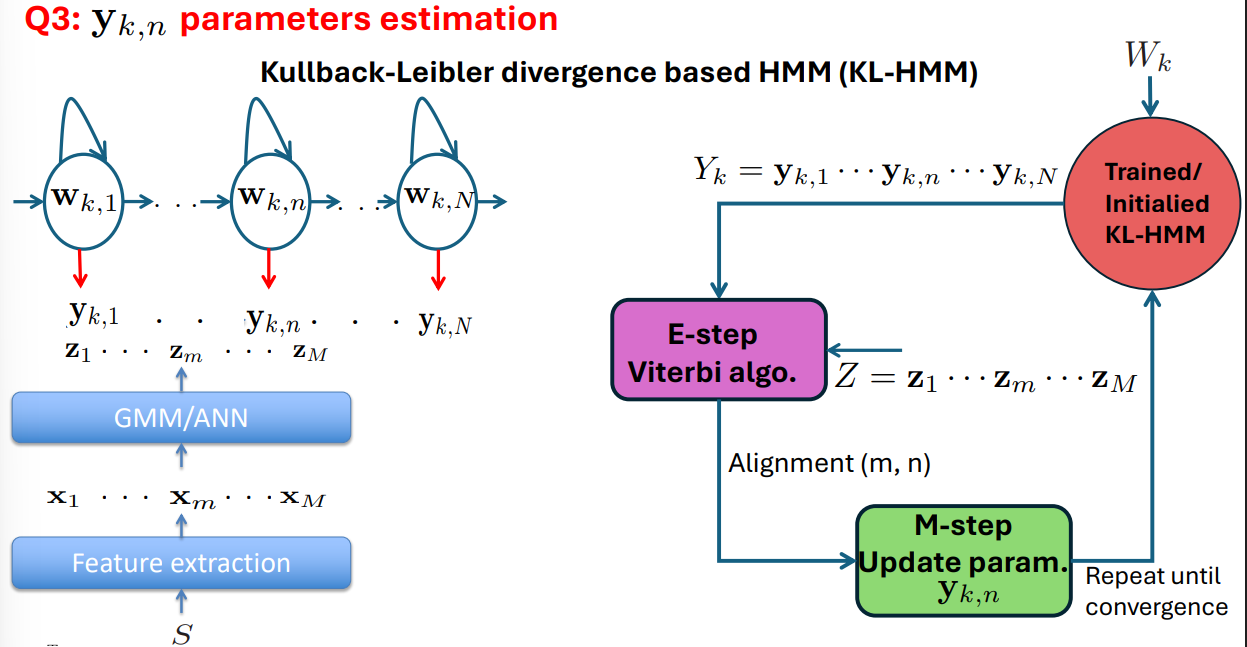

PS. KL divergence: $KL(Y_{k, n}, Z_{m}) \neq KL(Z_{m}, Y_{k, n})$


### Comparison of Approaches: 

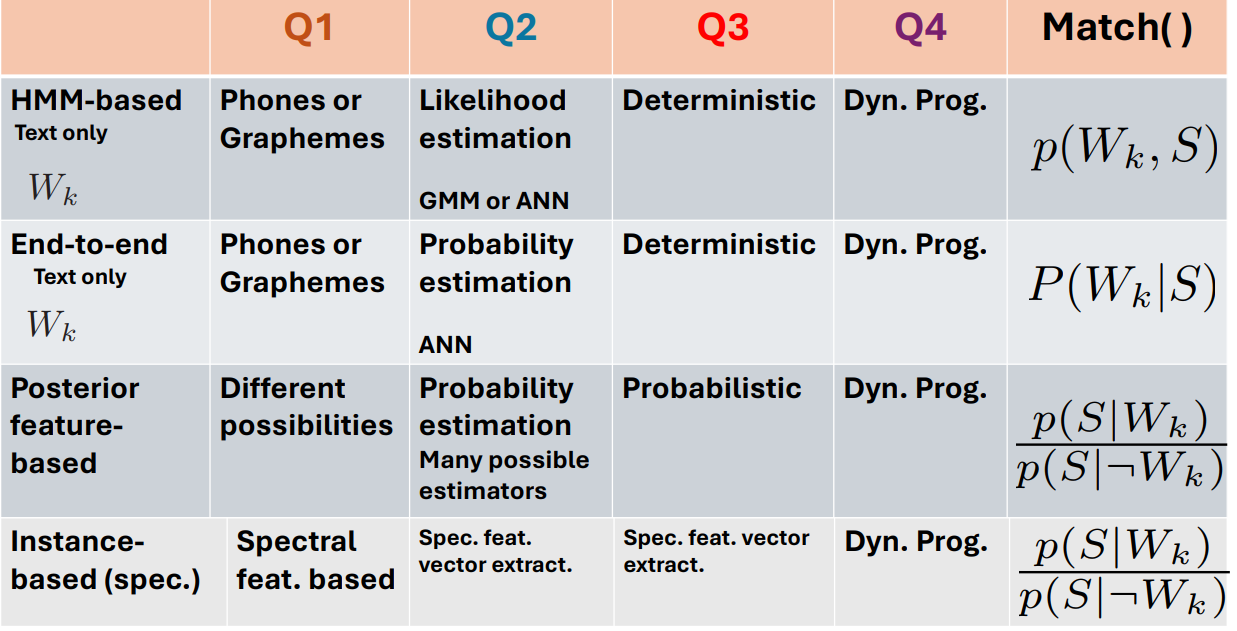

### Additional Notes: 

Q2 can be trained with other-languages phonemes, even for a language where we have no transcribed speech, nor a dictionary, we can still have a performant model. We can develop dictionaries and everything.

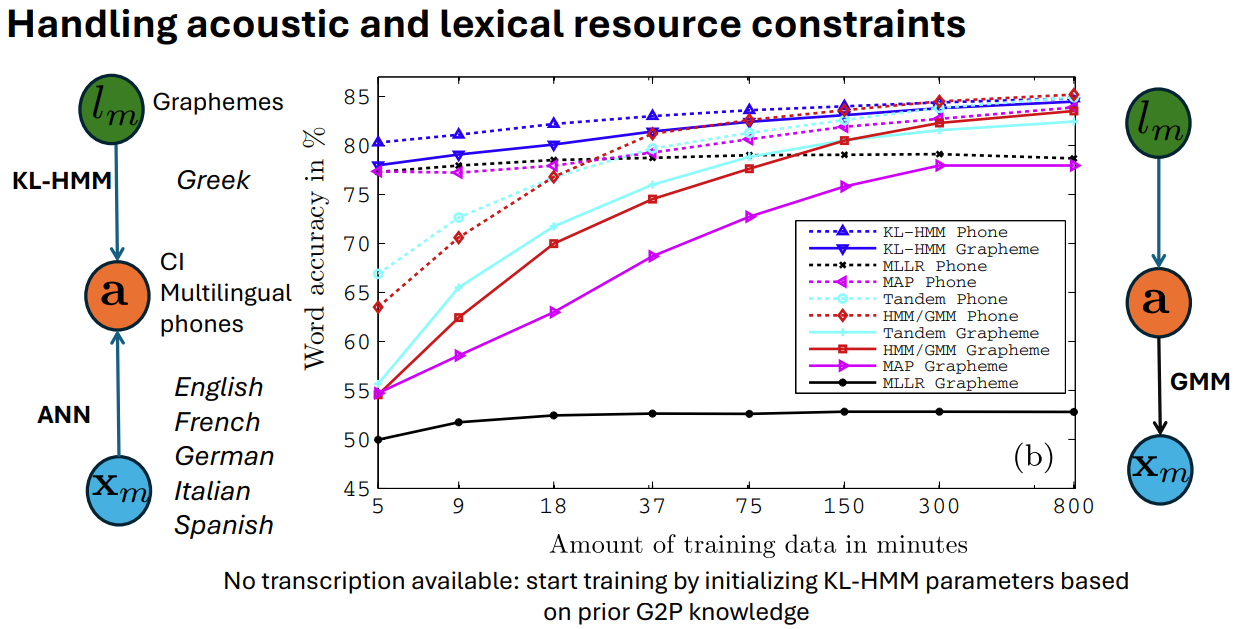

Now there remains the problems of the distinction between same-word and different-word distributions.

This problem comes for TTS (Text-to-Speech) Synthesizers, where we would have to have a subjective intelligibility assessment, where we have listeners listening to the synthesizers words, and checking their accuracy, their intelligibility, not looking at their quality yet, but rather first if they are understandable. Now changing these listeners, might and most probably will change results, which cannot be practical.
So instead of listeners, we would use Speech Recognizers, trained on real human speech, since we would want the synthesizer to have an as close as possible to the humans, we already hae the phonetic transciption obtained from a lexicon. And we use HMMs, perform KL divergence per word and threshold the KL scores, then Viterbi's alignment, and we would compute the word recall to predict listener's word recognition. 

For pathological speakers, we would want to perform subjective intelligibility assessment. Human listeners would have a high variability in their recognition, and the accuracy was 0-5% recognition. Now trying to simulate the listeners, we took healthy speakers, speaking the same words as the pathological problems, and then we apply the same method. Same-word and different-word distributions, using both the healthy speakers' words as well as the pathological speakers' utterances, and then check the treshold, as compared to the threshold using only healthy speakers' utterances.


### Conclusion about the Posterior feature based Approach

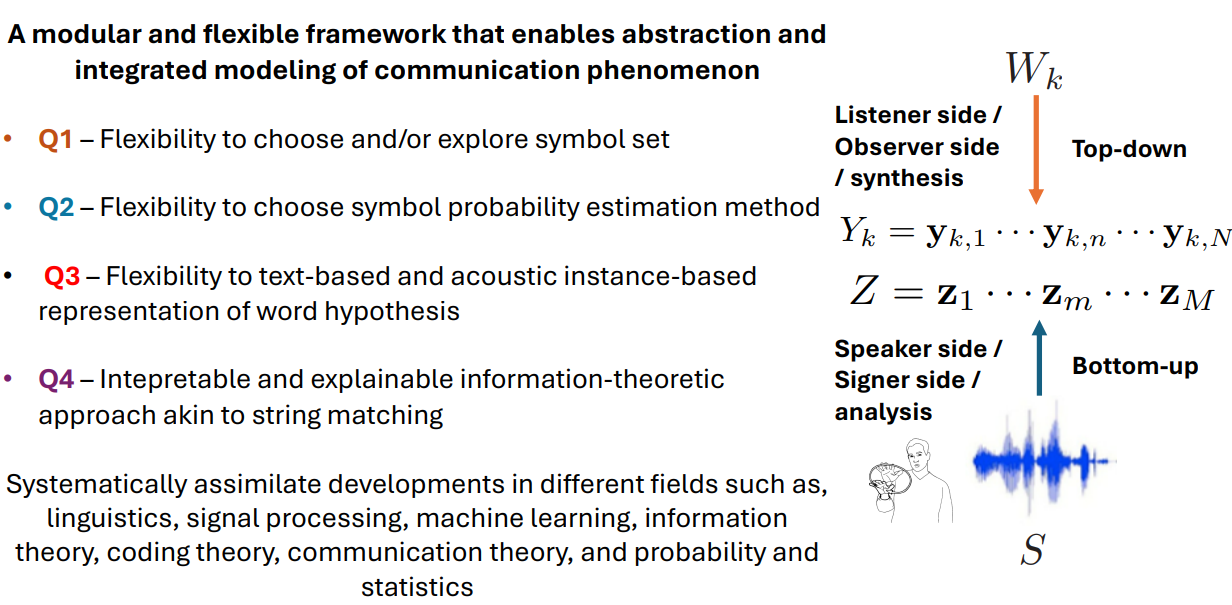